# POKER HAND - Data Preprocessing
In this notebook, we will prepare the data and do some preprocessing along with visualizations. In the end we will save a proper pandas dataframe of this dataset (which we will use for various machine learning and deep learning algorithms).

## Data loading and exploration

In [2]:
import pandas as pd

In [30]:
df = pd.read_csv('../../dataset/poker-hand-training-true.data')

In [31]:
df.head()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [33]:
df.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C4', 'S4', 'C4', 'S5', 'C5', 'Hand']
df.head()

,S1,C1,S2,C2,S3,C4,S4,C4,S5,C5,Hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [35]:
print(f'Rows = {df.shape[0]} \nColumns = {df.shape[1]}')

Rows = 25009 
Columns = 11


In [36]:
df.describe()

,S1,C1,S2,C2,S3,C4,S4,C4,S5,C5,Hand
count,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000
mean,2.508817,6.995122,2.497781,7.014035,2.510296,7.013915,2.495981,6.942261,2.497381,6.962973,0.620817
std,1.116465,3.749832,1.121750,3.766965,1.123130,3.744858,1.115991,3.747086,1.118715,3.741463,0.786594
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [37]:
df.isnull().sum()

S1      0
C1      0
S2      0
C2      0
S3      0
C4      0
S4      0
C4      0
S5      0
C5      0
Hand    0
dtype: int64

Hence, we see that there is no missing value in any column and our dataset is also huge i.e. 25009 entries. This is good news as we have plenty of data for training - around 20,000 entries.

Let us visualize and see the data.

## Data visualization

In [44]:
import matplotlib as plt

In [45]:
df['Hand'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        4
Name: Hand, dtype: int64

<AxesSubplot:>

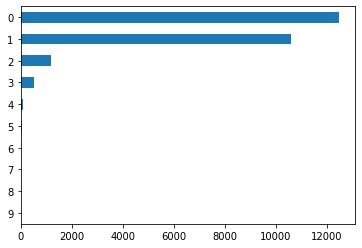

In [46]:
df['Hand'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='Hand'>

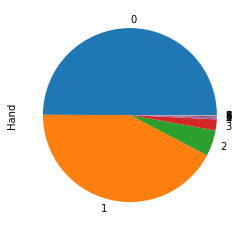

In [64]:
df['Hand'].value_counts().plot(kind='pie')

It looks like the data goes to imbalance when we go towards more rare poker hands - which is consistent with real life scenarios too.

It seems that there is no need for further EDA because the data is already vectorized. Now we can save this dataframe and start applying ML DL algorithms.

In [82]:
df.to_csv('../../dataset/poker-hand-traintest')

Let us do the same with testing data. However, we will use training data for validation data (80-20 rule). And use testing data separately as the actual testing data.

In [3]:
df_testing = pd.read_csv('../../dataset/poker-hand-testing.data')

In [4]:
df_testing.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [5]:
df_testing.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C4', 'S4', 'C4', 'S5', 'C5', 'Hand']
df_testing.head()

,S1,C1,S2,C2,S3,C4,S4,C4,S5,C5,Hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [6]:
print(f'Rows = {df_testing.shape[0]} \nColumns = {df_testing.shape[1]}')

Rows = 999999 
Columns = 11


It looks like we will have to use 3 proportions of the testing data to determine the accuracy of our model. All that headache will be taken care of in ML DL notebooks.

In [7]:
df_testing.to_csv('../../dataset/poker-hand-test')

Hence, we are done with the EDA part now.